<a href="https://colab.research.google.com/github/anudeepk17/Independent_Projects/blob/main/HW2_Anudeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

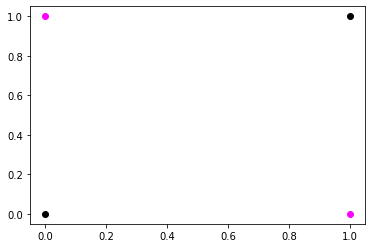

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def XOR (a, b):
    if a != b:
        return 1
    else:
        return 0

x = [0,0,1,1]
y = [0,1,0,1]
for i in range(4):
  a=XOR(x[i],y[i])
  if a:
    col='magenta'
  else:
    col='black'
  plt.scatter(x[i],y[i],c=col)


plt.show()


## Question 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator
import json
def entropy(df,y):
        ent = 0
        for target in np.unique(df[y]):
            pr = df[y].value_counts()[target] / len(df[y])
            ent += -pr * np.log2(pr)

        return ent

def entropycalc( df,S , entropy_parent,Y):
        thresh = None
        info_gain_ratio = 0
        #print("\n Feature: {}".format(S))

        for val in np.unique(df[S]):
            cur_entropy = 0
            cutoff = val
            SgivenY = 0
            for operation in [operator.lt, operator.ge]:
                entropy_S = 0
                numOfFeat = 0
                for cat in np.unique(df[Y]):
                    numY = len(df[S][operation(df[S], cutoff)][df[Y] == cat])
                    numOfFeat = len(df[S][operation(df[S], cutoff)])

                    if numOfFeat == 0:
                        continue
                    probYgivenFeat = numY / numOfFeat
                    if probYgivenFeat > 0:
                        entropy_S += -probYgivenFeat * np.log2(probYgivenFeat)

                probFeat = numOfFeat / len(df)
                cur_entropy += probFeat * entropy_S
                if probFeat > 0:
                    SgivenY += -probFeat * np.log2(probFeat)
            if SgivenY == 0:
                print("\n Mutual Information: {}".format(entropy_parent - cur_entropy))
                print("If Split at: {}".format(cutoff))
                continue
            cur_info_gain_ratio = (entropy_parent - cur_entropy) / SgivenY
            cur_info_gain = (entropy_parent - cur_entropy)
            print("\n Info Gain ratio: {}".format(cur_info_gain_ratio))
            print("\n Info Gain: {}".format(cur_info_gain))
            print("If Split at: {}".format(cutoff))

                
            if cur_info_gain_ratio > info_gain_ratio:
                info_gain_ratio = cur_info_gain_ratio
                thresh = cutoff

        return info_gain_ratio, thresh


In [4]:
df= pd.read_table('Druns.txt', sep=" ", header=None, names=["X1", "X2", "Y"])

In [5]:
entropycalc(df,'X1',entropy(df,'Y'),'Y')


 Mutual Information: 0.0
If Split at: 0.0

 Info Gain ratio: 0.10051807676021828

 Info Gain: 0.04417739186726133
If Split at: 0.1


(0.10051807676021828, 0.1)

In [6]:
entropycalc(df,'X2',entropy(df,'Y'),'Y')


 Mutual Information: 0.0
If Split at: -2

 Info Gain ratio: 0.10051807676021828

 Info Gain: 0.04417739186726133
If Split at: -1

 Info Gain ratio: 0.055953759631263526

 Info Gain: 0.03827452220629246
If Split at: 0

 Info Gain ratio: 0.00578004220515232

 Info Gain: 0.004886164091842726
If Split at: 1

 Info Gain ratio: 0.0011443495172767494

 Info Gain: 0.0010821659130775263
If Split at: 2

 Info Gain ratio: 0.016411136842102134

 Info Gain: 0.016313165825732057
If Split at: 3

 Info Gain ratio: 0.049749064181778546

 Info Gain: 0.04945207278939401
If Split at: 4

 Info Gain ratio: 0.11124029586339801

 Info Gain: 0.10519553207004628
If Split at: 5

 Info Gain ratio: 0.23609960614360798

 Info Gain: 0.19958702318968735
If Split at: 6

 Info Gain ratio: 0.055953759631263526

 Info Gain: 0.03827452220629246
If Split at: 7

 Info Gain ratio: 0.4301569161309807

 Info Gain: 0.18905266854301617
If Split at: 8


(0.4301569161309807, 8)

## Question 4

In [25]:
df1= pd.read_table('D3leaves.txt', sep=" ", header=None, names=["X1", "X2", "Y"])

In [ ]:
ig1,th1=entropycalc(df,'X1',entropy(df1,'Y'),'Y')
ig2,th2=entropycalc(df,'X2',entropy(df1,'Y'),'Y')


In [9]:
Node={ig1:'X1',ig2:'X2'}
igmax,Threshold=max(ig1,ig2),max(th1,th2)
print("Node:",Node[igmax],"\tThreshold:",Threshold)

Node: X2 	Threshold: 8


Let us define a class that incorporates the above code and makes a tree

In [10]:
class DecisionTree:
    def __init__(self):
        self.tree = None
        self.features = list
        self.XTrain = np.array
        self.yTrain = np.array
        self.num_feats = int
        self.train_size = int
        self.nodes = 0

    def fit(self, X, y):
        self.XTrain = X
        self.yTrain = y
        self.features = list(X.columns)
        self.train_size = X.shape[0]
        self.num_feats = X.shape[1]

        df = X.copy()
        df['category'] = y.copy()

        self.tree = self.make_subtree(df)
        s = str(self.tree)
        s = s.replace("\'", "\"")
        json_object = json.loads(s)
        print(json.dumps(json_object, indent=2))

    def make_subtree(self, df, tree=None):
        feature, cutoff = self.find_best_split(df)
        categories, count = np.unique(df['category'], return_counts=True)
        if tree is None:
            tree = {feature: {}}
        if cutoff == None:
          tree[feature]['>=' + str(-2.5) + ' then'] = 1
          return tree
        
        self.nodes +=1  

        # Left Child
        new_df = self.splitData(df, feature, cutoff, operator.ge)
        categories, count = np.unique(new_df['category'], return_counts=True)

        if len(count) == 1:  # all are same category
            tree[feature]['>=' + str(cutoff) + ' then'] = categories[0]
        else:
            tree[feature]['>=' + str(cutoff) + ' then'] = self.make_subtree(new_df)

        # Right Child
        new_df = self.splitData(df, feature, cutoff, operator.lt)
        categories, count = np.unique(new_df['category'], return_counts=True)

        if len(count) == 1:  # all are same category
            tree[feature]['else ' + '<' + str(cutoff)] = categories[0]
        else:
            tree[feature]['else ' + '<' + str(cutoff)] = self.make_subtree(new_df)

        return tree
    def splitData(self, df, feature, decide, operation):
        return df[operation(df[feature], decide)].reset_index(drop=True)
    def entropy(self,df):
        ent = 0
        for target in np.unique(df['category']):
            pr = df['category'].value_counts()[target] / len(df['category'])
            ent += -pr * np.log2(pr)

        return ent

    def entropycalc( self,df,S , entropy_parent):
        thresh = None
        info_gain_ratio = 0
        #print("\n Feature: {}".format(S))

        for val in np.unique(df[S]):
            cur_entropy = 0
            cutoff = val
            SgivenY = 0
            for operation in [operator.lt, operator.ge]:
                entropy_S = 0
                numOfFeat = 0
                for cat in np.unique(df['category']):
                    numY = len(df[S][operation(df[S], cutoff)][df['category'] == cat])
                    numOfFeat = len(df[S][operation(df[S], cutoff)])

                    if numOfFeat == 0:
                        continue
                    probYgivenFeat = numY / numOfFeat
                    if probYgivenFeat > 0:
                        entropy_S += -probYgivenFeat * np.log2(probYgivenFeat)

                probFeat = numOfFeat / len(df)
                cur_entropy += probFeat * entropy_S
                if probFeat > 0:
                    SgivenY += -probFeat * np.log2(probFeat)
            if SgivenY == 0:
                #print("\n Mutual Information: {}".format(entropy_parent - cur_entropy))
                #print("If Split at: {}".format(cutoff))
                continue
            cur_info_gain_ratio = (entropy_parent - cur_entropy) / SgivenY
            cur_info_gain = (entropy_parent - cur_entropy)
            #print("\n Info Gain ratio: {}".format(cur_info_gain_ratio))
            #print("\n Info Gain: {}".format(cur_info_gain))
            #print("If Split at: {}".format(cutoff))

                
            if cur_info_gain_ratio > info_gain_ratio:
                info_gain_ratio = cur_info_gain_ratio
                thresh = cutoff
        return info_gain_ratio, thresh
    def find_best_split(self, df):
          igr = []
          thresholds = []

          for feature in list(df.columns[:-1]):
              entropy_parent = self.entropy(df)  # H(T)
              info_gain_ratio, threshold = self.entropycalc(df, feature, entropy_parent)  # H(T|a)

              igr.append(info_gain_ratio)
              thresholds.append(threshold)
         
          #print(thresholds)
          #print(igr) 
          return df.columns[:-1][np.argmax(igr)], thresholds[np.argmax(igr)]



In [26]:
X, y = df1.drop([df1.columns[-1]], axis=1), df1[df1.columns[-1]]
dt_clf1 = DecisionTree()
dt_clf1.fit(X, y)
print(dt_clf1.nodes)

{
  "X1": {
    ">=10 then": 1,
    "else <10": {
      "X2": {
        ">=3 then": 1,
        "else <3": 0
      }
    }
  }
}
2


## Question 5

In [28]:
df2= pd.read_table('D1.txt', sep=" ", header=None, names=["X1", "X2", "Y"])
X, y = df2.drop([df2.columns[-1]], axis=1), df2[df2.columns[-1]]
dt_clf2 = DecisionTree()
dt_clf2.fit(X, y)
print(dt_clf2.nodes)

{
  "X2": {
    ">=0.201829 then": 1,
    "else <0.201829": 0
  }
}
1


### Question 5c

In [29]:
df3= pd.read_table('D2.txt', sep=" ", header=None, names=["X1", "X2", "Y"])
X, y = df3.drop([df3.columns[-1]], axis=1), df3[df3.columns[-1]]
dt_clf3 = DecisionTree()
dt_clf3.fit(X, y)
print(dt_clf3.nodes)

{
  "X1": {
    ">=0.533076 then": {
      "X2": {
        ">=0.228007 then": {
          "X2": {
            ">=0.424906 then": 1,
            "else <0.424906": {
              "X1": {
                ">=0.708127 then": 1,
                "else <0.708127": {
                  "X2": {
                    ">=0.32625 then": {
                      "X1": {
                        ">=0.595471 then": {
                          "X1": {
                            ">=0.646007 then": 1,
                            "else <0.646007": {
                              "X2": {
                                ">=0.403494 then": 1,
                                "else <0.403494": 0
                              }
                            }
                          }
                        },
                        "else <0.595471": 0
                      }
                    },
                    "else <0.32625": 0
                  }
                }
              }
            }
        

#Question 6

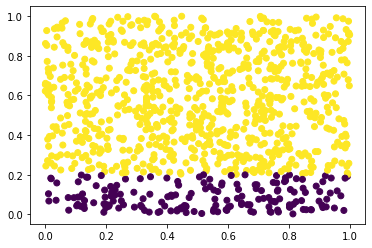

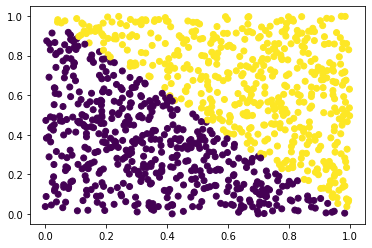

In [23]:
plt.scatter(df2['X1'], df2['X2'], c=df2['Y'])
plt.show()
plt.scatter(df3['X1'], df3['X2'], c=df3['Y'])
plt.show()


To test the decision tree we create a variable with 10000 points and use the Decision tree class object to predict the classes using these test points.

In [37]:
Xtest=pd.DataFrame(np.random.uniform(0,1,size=(10000,2)), columns=list(['X1','X2']))

Below we create a prediction function that takes in the class and predicts the output.

In [40]:
def predict(X,dt_clf):
  results = []
  #Create a dictionary with index and value as the values of columns of input dataset
  coldict = {key: i for i, key in enumerate(list(X.columns))}
  #Calls the prediction columnwise
  for i in range(len(X)):
      results.append(predict_X(coldict, X.iloc[i], dt_clf.tree))

  return np.array(results)

def predict_X(coldict, x, tree):
  for node in tree.keys():
      val = x[node]
      cutoff = str(list(tree[node].keys())[0]).split('>=')[1].split(' ')[0]

      if val >= float(cutoff):  # Left Child
          tree = tree[node]['>=' + cutoff + ' then']
      else:  # Right Child
          tree = tree[node]['else ' + '<' + cutoff]

      prediction = str

      if type(tree) is dict:
          prediction = predict_X(coldict, x, tree)
      else:
          predict = tree
          return predict

  return prediction


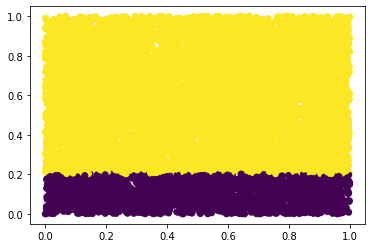

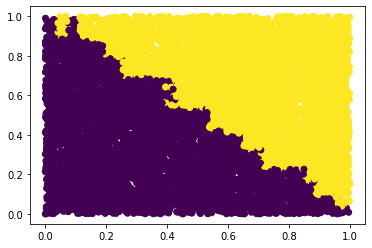

In [41]:
plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf2))
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf3))
plt.show()

#Question 7

In [44]:
def error_score(ytrue, ypred):
    return round(float(sum(ypred != ytrue)) / float(len(ytrue)) * 100, 2)

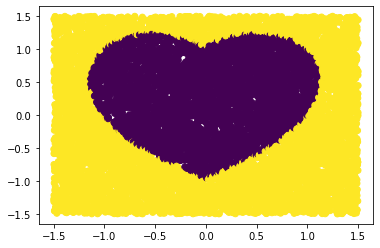

In [45]:
data = pd.read_table('Dbig.txt', sep=" ", header=None, names=["X1", "X2", "Y"])
Xtest=pd.DataFrame(np.random.uniform(-1.5,1.5,size=(2000,2)), columns=list(['X1','X2']))
# Split Features and target
X, y = data.drop([data.columns[-1]], axis=1), data[data.columns[-1]]
plt.scatter(data['X1'], data['X2'], c=data['Y'])
plt.show()

32
{
  "X2": {
    ">=-0.759475 then": {
      "X1": {
        ">=-0.775965 then": {
          "X1": {
            ">=1.31982 then": 1,
            "else <1.31982": {
              "X2": {
                ">=1.45504 then": 1,
                "else <1.45504": {
                  "X2": {
                    ">=1.088818 then": {
                      "X1": {
                        ">=-0.000528 then": 1,
                        "else <-0.000528": 0
                      }
                    },
                    "else <1.088818": 0
                  }
                }
              }
            }
          }
        },
        "else <-0.775965": 1
      }
    },
    "else <-0.759475": 1
  }
}

Test Error: 16.87


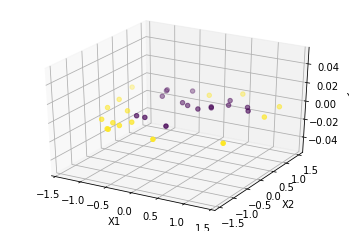

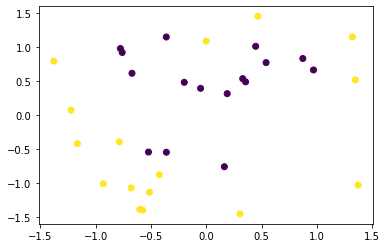

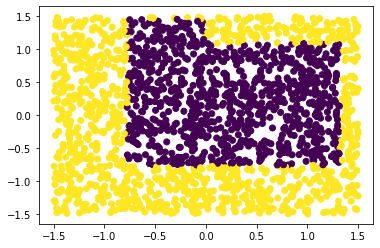

128
{
  "X2": {
    ">=-0.823998 then": {
      "X1": {
        ">=1.121401 then": 1,
        "else <1.121401": {
          "X2": {
            ">=1.177672 then": 1,
            "else <1.177672": {
              "X1": {
                ">=-1.09737 then": {
                  "X1": {
                    ">=-1.043185 then": {
                      "X1": {
                        ">=-0.768264 then": {
                          "X1": {
                            ">=0.936977 then": {
                              "X1": {
                                ">=0.945352 then": 0,
                                "else <0.945352": 1
                              }
                            },
                            "else <0.936977": 0
                          }
                        },
                        "else <-0.768264": {
                          "X1": {
                            ">=-0.802752 then": 1,
                            "else <-0.802752": 0
                          }

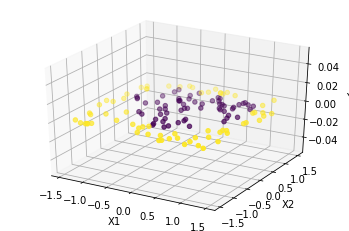

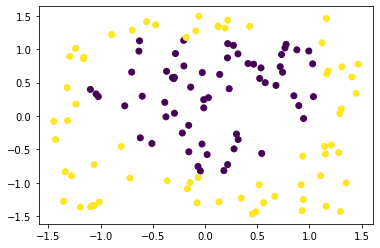

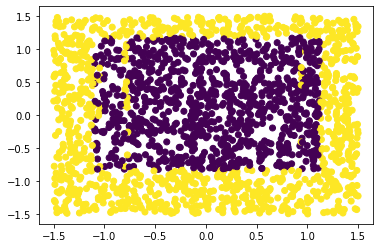

512
{
  "X2": {
    ">=-0.827372 then": {
      "X1": {
        ">=1.058659 then": 1,
        "else <1.058659": {
          "X2": {
            ">=1.220292 then": 1,
            "else <1.220292": {
              "X1": {
                ">=-1.138432 then": {
                  "X1": {
                    ">=-1.099439 then": {
                      "X2": {
                        ">=-0.224103 then": {
                          "X2": {
                            ">=1.185965 then": {
                              "X1": {
                                ">=-0.691167 then": {
                                  "X1": {
                                    ">=0.018495 then": {
                                      "X1": {
                                        ">=0.60517 then": 0,
                                        "else <0.60517": 1
                                      }
                                    },
                                    "else <0.018495": 0
                       

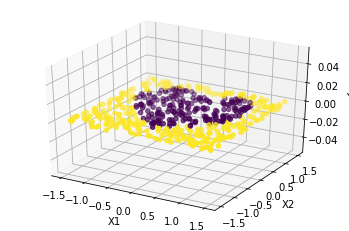

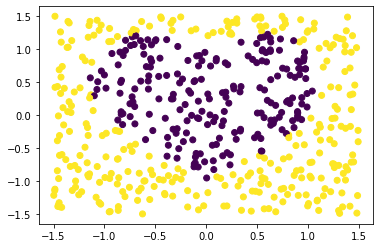

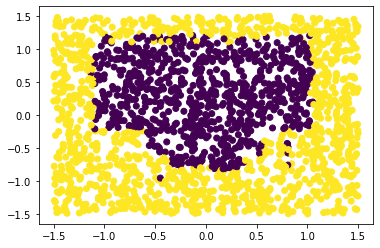

2048
{
  "X2": {
    ">=-0.925942 then": {
      "X2": {
        ">=1.235216 then": 1,
        "else <1.235216": {
          "X1": {
            ">=-1.135581 then": {
              "X1": {
                ">=1.130369 then": 1,
                "else <1.130369": {
                  "X2": {
                    ">=-0.518147 then": {
                      "X1": {
                        ">=-1.102858 then": {
                          "X2": {
                            ">=1.220012 then": {
                              "X2": {
                                ">=1.231492 then": 0,
                                "else <1.231492": {
                                  "X1": {
                                    ">=0.474951 then": {
                                      "X1": {
                                        ">=1.07081 then": 1,
                                        "else <1.07081": 0
                                      }
                                    },
                      

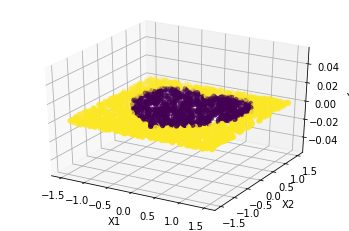

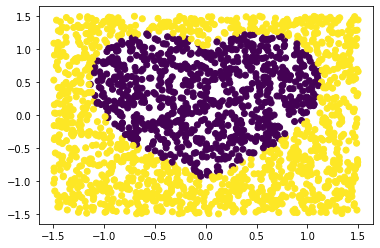

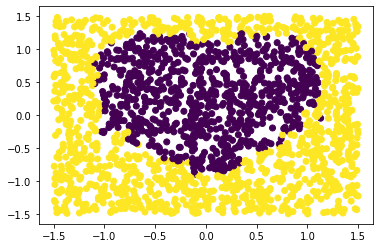

8192
{
  "X2": {
    ">=-0.856344 then": {
      "X2": {
        ">=1.232245 then": 1,
        "else <1.232245": {
          "X1": {
            ">=-1.138432 then": {
              "X1": {
                ">=1.135791 then": 1,
                "else <1.135791": {
                  "X2": {
                    ">=-0.711517 then": {
                      "X1": {
                        ">=1.06382 then": {
                          "X2": {
                            ">=0.165721 then": {
                              "X2": {
                                ">=0.786355 then": 1,
                                "else <0.786355": {
                                  "X1": {
                                    ">=1.135402 then": {
                                      "X1": {
                                        ">=1.135738 then": 0,
                                        "else <1.135738": 1
                                      }
                                    },
                      

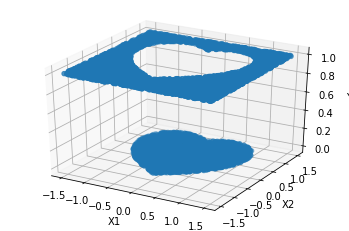

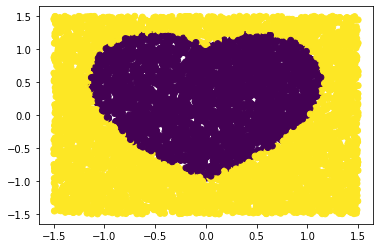

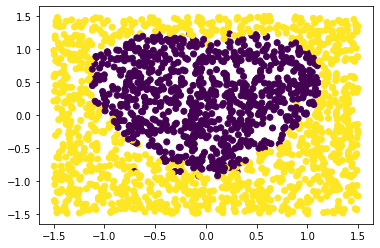

[  6  10  27  64 145]


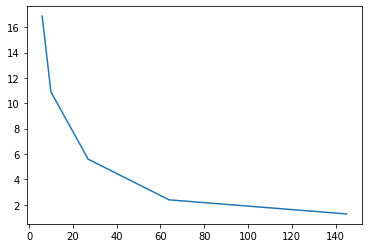

In [46]:
XAppend=[]
train=data.sample(frac=0.8192, random_state=0)
test=data.drop(train.index) 


train32 = train.iloc[0:32,:]

X, y = train32.drop([train32.columns[-1]], axis=1), train32[train32.columns[-1]]
print(len(train32))
dt_clf = DecisionTree()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E32 = error_score(y, predict(X,dt_clf))
print("\nTest Error: {}".format(E32))
XAppend.append(dt_clf.nodes)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train32['X1'], train32['X2'], c=train32['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train32['X1'], train32['X2'], c=train32['Y'])
plt.show()

plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf))
plt.show()

train128 = train.iloc[32:160,:]
print(len(train128))
X, y = train128.drop([train128.columns[-1]], axis=1), train128[train128.columns[-1]]
dt_clf = DecisionTree()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E128 = error_score(y, predict(X,dt_clf))
print("\nTest Error: {}".format(E128))
XAppend.append(dt_clf.nodes)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train128['X1'], train128['X2'], c=train128['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train128['X1'], train128['X2'], c=train128['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf))
plt.show()

train512 = train.iloc[160:672,:]
print(len(train512))
X, y = train512.drop([train512.columns[-1]], axis=1), train512[train512.columns[-1]]
dt_clf = DecisionTree()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E512 = error_score(y, predict(X,dt_clf))
print("\nTest Error: {}".format(E512))
XAppend.append(dt_clf.nodes)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train512['X1'], train512['X2'], c=train512['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train512['X1'], train512['X2'], c=train512['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf))
plt.show()

train2048 = train.iloc[672:2720,:]
print(len(train2048))
X, y = train2048.drop([train2048.columns[-1]], axis=1), train2048[train2048.columns[-1]]
dt_clf = DecisionTree()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E2048 = error_score(y, predict(X,dt_clf))
print("\nTest Error: {}".format(E2048))
XAppend.append(dt_clf.nodes)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train2048['X1'], train2048['X2'], c=train2048['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train2048['X1'], train2048['X2'], c=train2048['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf))
plt.show()

print(len(train))
X, y = train.drop([train.columns[-1]], axis=1), train[train.columns[-1]]
dt_clf = DecisionTree()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E8192 = error_score(y, predict(X,dt_clf))
print("\nTest Error: {}".format(E8192))
XAppend.append(dt_clf.nodes)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train['X1'], train['X2'], train['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train['X1'], train['X2'], c=train['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=predict(Xtest,dt_clf))
plt.show()

XAppend = np.array(XAppend)
Ycord = np.array([E32, E128, E512, E2048, E8192])
print(XAppend)

plt.plot(XAppend, Ycord)
plt.show()

#Question 3 
##SKLEARN
We reuse the above code just replacing our decision tree with sklearn

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

32

Test Error: 13.38


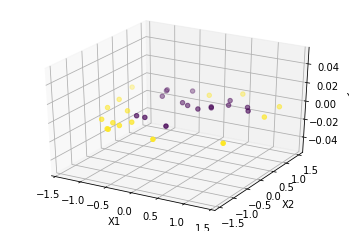

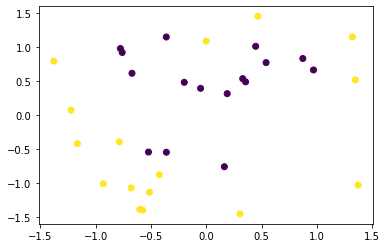

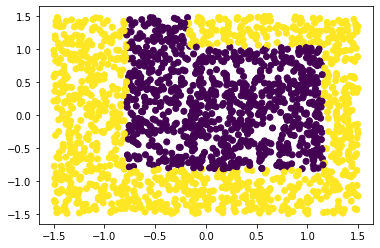

128

Test Error: 10.12


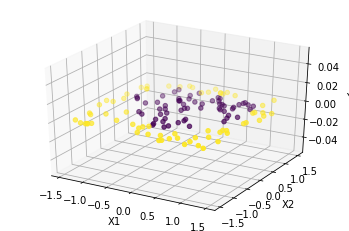

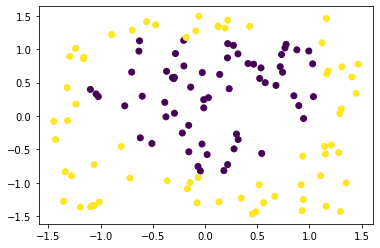

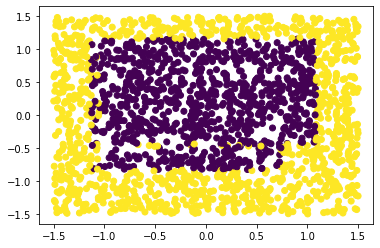

512

Test Error: 4.09


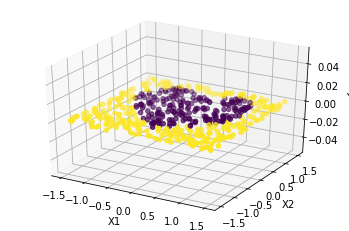

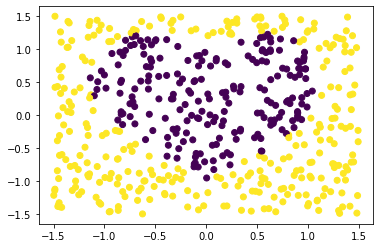

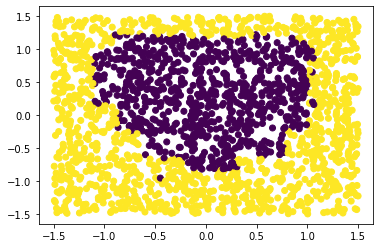

2048

Test Error: 2.1


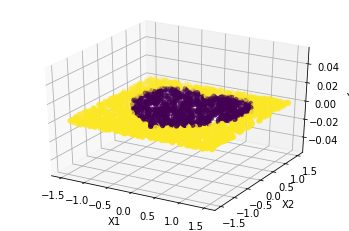

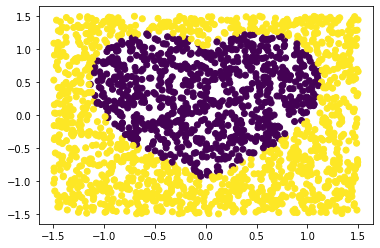

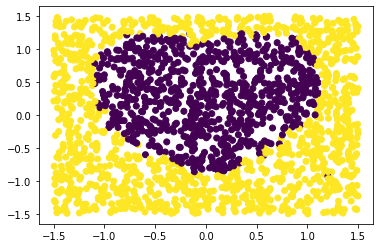

8192

Test Error: 1.0


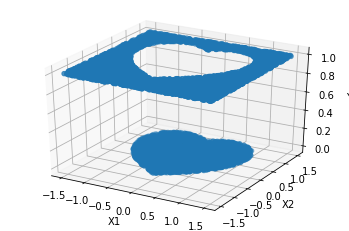

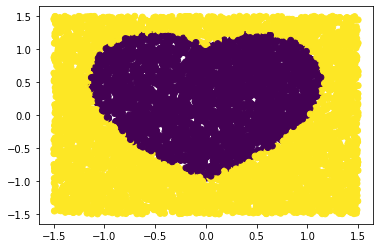

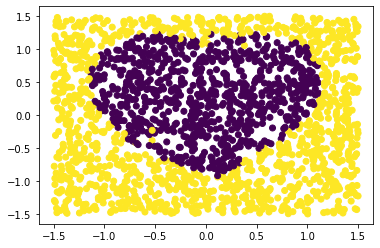

[ 11  19  53 129 249]


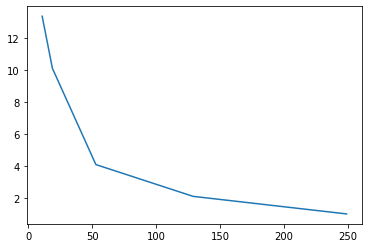

In [51]:
XAppend=[]
train=data.sample(frac=0.8192, random_state=0)
test=data.drop(train.index) 


train32 = train.iloc[0:32,:]

X, y = train32.drop([train32.columns[-1]], axis=1), train32[train32.columns[-1]]
print(len(train32))
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E32 = error_score(y, dt_clf.predict(X))
print("\nTest Error: {}".format(E32))
XAppend.append(dt_clf.tree_.node_count)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train32['X1'], train32['X2'], c=train32['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train32['X1'], train32['X2'], c=train32['Y'])
plt.show()

plt.scatter(Xtest['X1'], Xtest['X2'], c=dt_clf.predict(Xtest))
plt.show()

train128 = train.iloc[32:160,:]
print(len(train128))
X, y = train128.drop([train128.columns[-1]], axis=1), train128[train128.columns[-1]]
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E128 = error_score(y, dt_clf.predict(X))
print("\nTest Error: {}".format(E128))
XAppend.append(dt_clf.tree_.node_count)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train128['X1'], train128['X2'], c=train128['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train128['X1'], train128['X2'], c=train128['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=dt_clf.predict(Xtest))
plt.show()

train512 = train.iloc[160:672,:]
print(len(train512))
X, y = train512.drop([train512.columns[-1]], axis=1), train512[train512.columns[-1]]
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E512 = error_score(y, dt_clf.predict(X))
print("\nTest Error: {}".format(E512))
XAppend.append(dt_clf.tree_.node_count)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train512['X1'], train512['X2'], c=train512['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train512['X1'], train512['X2'], c=train512['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=dt_clf.predict(Xtest))
plt.show()

train2048 = train.iloc[672:2720,:]
print(len(train2048))
X, y = train2048.drop([train2048.columns[-1]], axis=1), train2048[train2048.columns[-1]]
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E2048 = error_score(y, dt_clf.predict(X))
print("\nTest Error: {}".format(E2048))
XAppend.append(dt_clf.tree_.node_count)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train2048['X1'], train2048['X2'], c=train2048['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train2048['X1'], train2048['X2'], c=train2048['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=dt_clf.predict(Xtest))
plt.show()

print(len(train))
X, y = train.drop([train.columns[-1]], axis=1), train[train.columns[-1]]
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)
X, y = test.drop([test.columns[-1]], axis=1), test[test.columns[-1]]
E8192 = error_score(y, dt_clf.predict(X))
print("\nTest Error: {}".format(E8192))
XAppend.append(dt_clf.tree_.node_count)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train['X1'], train['X2'], train['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

plt.scatter(train['X1'], train['X2'], c=train['Y'])
plt.show()
plt.scatter(Xtest['X1'], Xtest['X2'], c=dt_clf.predict(Xtest))
plt.show()

XAppend = np.array(XAppend)
Ycord = np.array([E32, E128, E512, E2048, E8192])
print(XAppend)

plt.plot(XAppend, Ycord)
plt.show()

# Question 4
Lagranges Interpolation

In [5]:
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
def randomSel(Xtrain,Ytrain,n):
  index = np.random.choice(Xtrain.shape[0], n, replace=False) 
  x_random = Xtrain[index]
  y_random = Ytrain[index]
  return x_random,y_random

def plotPred(poly,Xtrain,Ytrain):
  ypred16=Polynomial(poly.coef[::-1])(Xtrain)
  plt.scatter(Xtrain, Ytrain, label='data')
  plt.scatter(Xtrain, ypred16, label='Polynomial trained')
  plt.legend()
  plt.show()
  return ypred16

def mse(ypred16,Ytrain):
  err16=0
  for i in range(len(ypred16)):
    err16+=(ypred16[i]-Ytrain[i])**2
  mser=np.sqrt(err16/len(ypred16))
  print("Mean squared Error on datapoints :",mser)
  return mser

Xtrain = np.random.uniform(0, 2*math.pi, size=100)
Ytrain = np.sin(Xtrain)
Xtest = np.random.uniform(0, 2*math.pi, size=100)
Ytest = np.sin(Xtest)
x_random,y_random=randomSel(Xtrain,Ytrain,16)
poly = lagrange((x_random),(y_random))
poly100= lagrange((Xtrain),(Ytrain))

Training on 100 and 16 random training points

Testing on training set

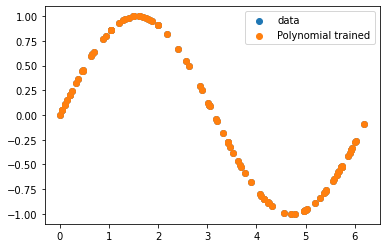

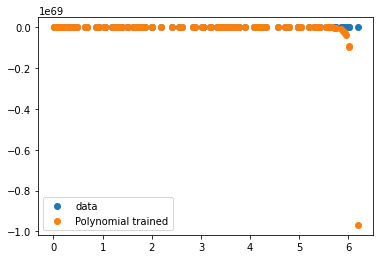

In [228]:
ypred16=plotPred(poly,Xtrain,Ytrain)
ypred100=plotPred(poly100,Xtrain,Ytrain)

MSE on training data

In [229]:
mse(ypred16,Ytrain)
mse(ypred100,Ytrain)

Mean squared Error on datapoints : 4.464847788851607e-06
Mean squared Error on datapoints : 9.787942860736771e+67


9.787942860736771e+67

Testing on Test set

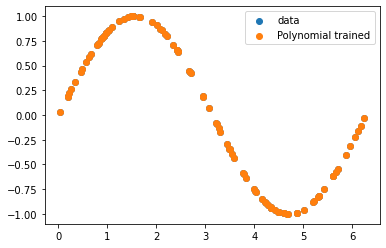

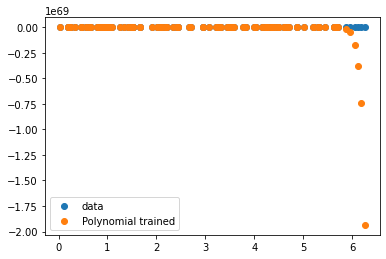

In [230]:
ypred16=plotPred(poly,Xtest,Ytest)
ypred100=plotPred(poly100,Xtest,Ytest)

In [213]:
mse(ypred16,Ytest)
mse(ypred100,Ytest)

Mean squared Error on datapoints : 0.00010328874652770993
Mean squared Error on datapoints : 2.0214972504395186e+75


2.0214972504395186e+75

Adding Guassian Noise

In [9]:
def noiseadd(sigma):
  noise = np.random.normal(0, sigma, [100])
  XNoise=noise+Xtrain
  plt.scatter(XNoise, Ytrain, label='Noisy Data')
  plt.show()
  x_noise,y_random=randomSel(XNoise,Ytrain,16)
  poly = lagrange((x_noise),(y_random))
  ypredtrain=plotPred(poly,x_noise,y_random)
  ypredtest=plotPred(poly,Xtest,Ytest)
  print("===Error for training data====")
  mse(ypredtrain,y_random)
  print("===Error for Full data====")
  mse(ypredtest,Ytest)


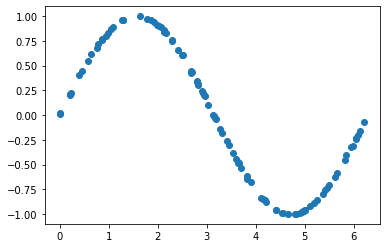

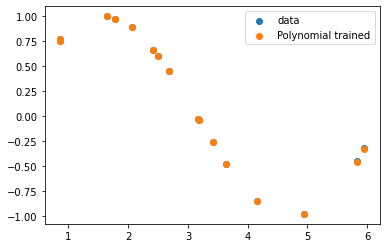

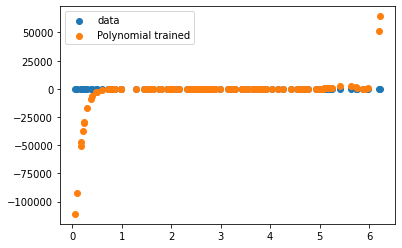

===Error for training data====
Mean squared Error on datapoints : 0.0022935138024379035
===Error for Full data====
Mean squared Error on datapoints : 18972.49302340084


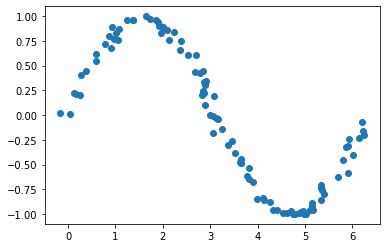

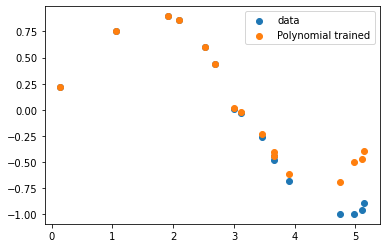

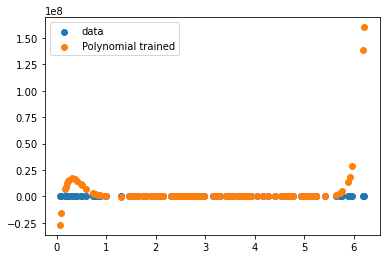

===Error for training data====
Mean squared Error on datapoints : 0.22828679454074977
===Error for Full data====
Mean squared Error on datapoints : 22150941.843166087


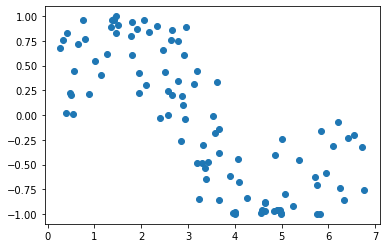

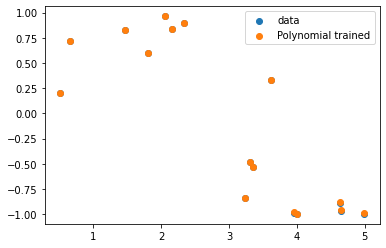

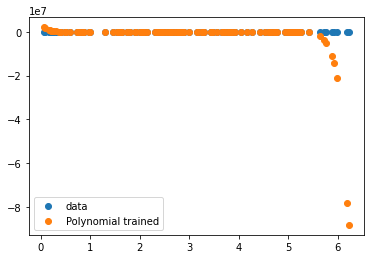

===Error for training data====
Mean squared Error on datapoints : 0.003901522928878189
===Error for Full data====
Mean squared Error on datapoints : 12128392.538187863


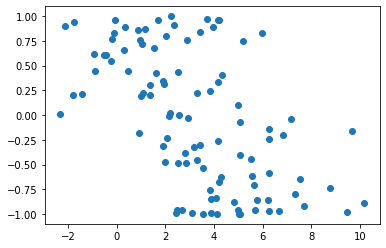

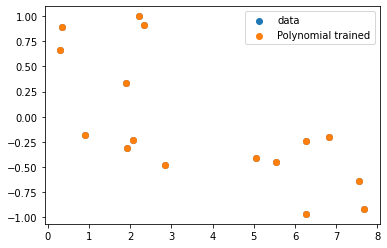

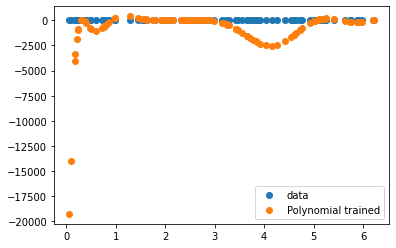

===Error for training data====
Mean squared Error on datapoints : 0.0006177432196047711
===Error for Full data====
Mean squared Error on datapoints : 2585.024213102922


In [10]:
noiseadd(0.01)
noiseadd(0.1)
noiseadd(0.5)
noiseadd(2)